## Preprocessing

In [30]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
from google.colab import drive
drive.mount('/content/gdrive')

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [31]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
#  YOUR CODE GOES HERE
application_df = application_df.drop(["EIN", "NAME"], axis = 1)

In [32]:
# Determine the number of unique values in each column.
#  YOUR CODE GOES HERE
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [33]:
# Look at APPLICATION_TYPE value counts for binning
#  YOUR CODE GOES HERE
app_type_counts = application_df["APPLICATION_TYPE"].value_counts()
app_type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [34]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
#  YOUR CODE GOES HERE
application_types_to_replace = list(app_type_counts[app_type_counts<500].index)
# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [35]:
# Look at CLASSIFICATION value counts for binning
#  YOUR CODE GOES HERE
class_counts = application_df["CLASSIFICATION"].value_counts()
class_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [36]:
# You may find it helpful to look at CLASSIFICATION value counts >1
#  YOUR CODE GOES HERE
class_counts[class_counts>1]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [37]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
#  YOUR CODE GOES HERE
classifications_to_replace = list(class_counts[class_counts<1500].index)
# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [38]:
# Convert categorical data to numeric with `pd.get_dummies`
#  YOUR CODE GOES HERE
dummies_data = pd.get_dummies(application_df)
dummies_data.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [39]:
# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE
y = dummies_data["IS_SUCCESSFUL"]
X = dummies_data.drop(["IS_SUCCESSFUL"], axis = 1)

# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [40]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

Model 1

In [41]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE

nn = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE
dense = tf.keras.layers.Dense(input_dim= len(X_train_scaled[0]), units=80, activation="relu")
nn.add(dense)

# Second hidden layer
#  YOUR CODE GOES HERE
dense1 = tf.keras.layers.Dense(units=30, activation="relu")
nn.add(dense1)

# Output layer
#  YOUR CODE GOES HERE
dense2 = tf.keras.layers.Dense(units=1, activation="sigmoid")
nn.add(dense2)

# Check the structure of the model
nn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 80)                3520      
                                                                 
 dense_13 (Dense)            (None, 30)                2430      
                                                                 
 dense_14 (Dense)            (None, 1)                 31        
                                                                 
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [42]:
# Compile the model
#  YOUR CODE GOES HERE
# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [43]:
# Train the model
#  YOUR CODE GOES HERE
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 8s 6ms/step - loss: 0.5691 - accuracy: 0.7228
Epoch 2/100
804/804 [==============================] - 4s 5ms/step - loss: 0.5538 - accuracy: 0.7313
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5515 - accuracy: 0.7327
Epoch 4/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5502 - accuracy: 0.7328
Epoch 5/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5490 - accuracy: 0.7326
Epoch 6/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5483 - accuracy: 0.7329
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5481 - accuracy: 0.7337
Epoch 8/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5467 - accuracy: 0.7342
Epoch 9/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5467 - accuracy: 0.7341
Epoch 10/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5460 - accura

In [44]:
1# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5565 - accuracy: 0.7256 - 498ms/epoch - 2ms/step
Loss: 0.5565186738967896, Accuracy: 0.7255976796150208


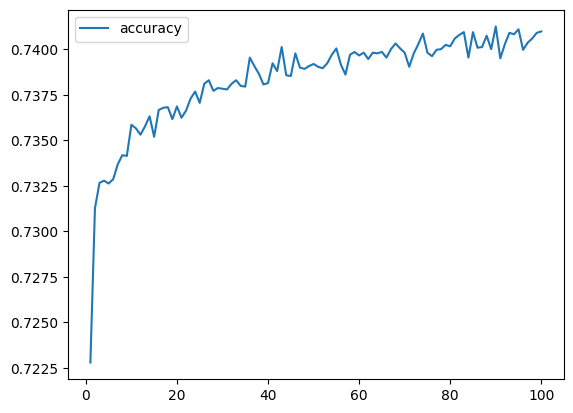

In [45]:
# Create a DataFrame containing training history
import matplotlib.pyplot as plt

history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the accuracy
history_df.plot(y="accuracy")
plt.show()

In [46]:
# Export our model to HDF5 file
#  YOUR CODE GOES HERE
nn.save("/content/gdrive/My Drive/Colab Notebooks/AlphabetSoupCharity_Optimization.h5")

Model 2

In [47]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE

nn = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE
dense = tf.keras.layers.Dense(input_dim= len(X_train_scaled[0]), units=80, activation="tanh")
nn.add(dense)

# Second hidden layer
#  YOUR CODE GOES HERE
dense1 = tf.keras.layers.Dense(units=30, activation="tanh")
nn.add(dense1)

# Output layer
#  YOUR CODE GOES HERE
dense2 = tf.keras.layers.Dense(units=1, activation="sigmoid")
nn.add(dense2)

# Check the structure of the model
nn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 80)                3520      
                                                                 
 dense_16 (Dense)            (None, 30)                2430      
                                                                 
 dense_17 (Dense)            (None, 1)                 31        
                                                                 
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


In [48]:
# Compile the model
#  YOUR CODE GOES HERE
 # Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [49]:
# Train the model
#  YOUR CODE GOES HERE
fit_model = nn.fit(X_train_scaled, y_train, epochs=200)

Epoch 1/200
804/804 [==============================] - 3s 2ms/step - loss: 0.5706 - accuracy: 0.7227
Epoch 2/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5559 - accuracy: 0.7294
Epoch 3/200
804/804 [==============================] - 2s 3ms/step - loss: 0.5522 - accuracy: 0.7313
Epoch 4/200
804/804 [==============================] - 3s 3ms/step - loss: 0.5512 - accuracy: 0.7324
Epoch 5/200
804/804 [==============================] - 2s 3ms/step - loss: 0.5494 - accuracy: 0.7329
Epoch 6/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5485 - accuracy: 0.7331
Epoch 7/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5482 - accuracy: 0.7340
Epoch 8/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5468 - accuracy: 0.7348
Epoch 9/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5461 - accuracy: 0.7335
Epoch 10/200
804/804 [==============================] - 2s 2ms/step - loss: 0.5460 - accura

In [50]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5589 - accuracy: 0.7252 - 741ms/epoch - 3ms/step
Loss: 0.5589151978492737, Accuracy: 0.7252478003501892


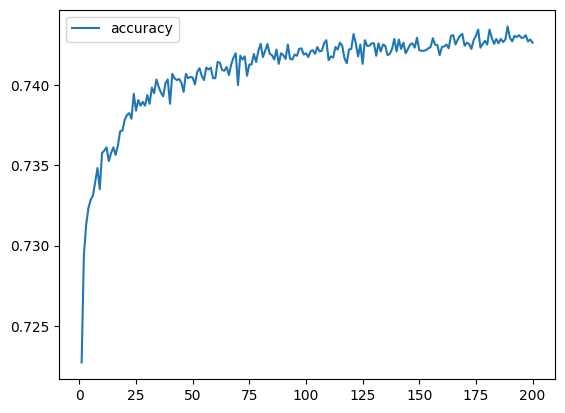

In [51]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the accuracy
history_df.plot(y="accuracy")
plt.show()

In [52]:
#save model 2
nn.save('/content/gdrive/My Drive/Colab Notebooks/AlphabetSoupCharity_Optimization2.h5')

Model 3

In [53]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE

nn = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE
dense1 = tf.keras.layers.Dense(input_dim= len(X_train_scaled[0]), units=110, activation="relu")
nn.add(dense1)

# Second hidden layer
#  YOUR CODE GOES HERE
dense2 = tf.keras.layers.Dense(units=100, activation="relu")
nn.add(dense2)

# Third hidden layer
#  YOUR CODE GOES HERE
dense3 = tf.keras.layers.Dense(units=100, activation="relu")
nn.add(dense3)

# Four hidden layer
#  YOUR CODE GOES HERE
dense4 = tf.keras.layers.Dense(units=100, activation="relu")
nn.add(dense4)

# Fifth hidden layer
#  YOUR CODE GOES HERE
dense5 = tf.keras.layers.Dense(units=100, activation="relu")
nn.add(dense5)

# Output layer
#  YOUR CODE GOES HERE
dense = tf.keras.layers.Dense(units=1, activation="sigmoid")
nn.add(dense)

# Check the structure of the model
nn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 110)               4840      
                                                                 
 dense_19 (Dense)            (None, 100)               11100     
                                                                 
 dense_20 (Dense)            (None, 100)               10100     
                                                                 
 dense_21 (Dense)            (None, 100)               10100     
                                                                 
 dense_22 (Dense)            (None, 100)               10100     
                                                                 
 dense_23 (Dense)            (None, 1)                 101       
                                                                 
Total params: 46,341
Trainable params: 46,341
Non-trai

In [54]:
# Compile the model
#  YOUR CODE GOES HERE
 # Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [55]:
# Train the model
#  YOUR CODE GOES HERE
fit_model = nn.fit(X_train_scaled, y_train, epochs=200)

Epoch 1/200
804/804 [==============================] - 5s 3ms/step - loss: 0.5695 - accuracy: 0.7231
Epoch 2/200
804/804 [==============================] - 3s 3ms/step - loss: 0.5566 - accuracy: 0.7300
Epoch 3/200
804/804 [==============================] - 3s 3ms/step - loss: 0.5537 - accuracy: 0.7310
Epoch 4/200
804/804 [==============================] - 3s 3ms/step - loss: 0.5519 - accuracy: 0.7332
Epoch 5/200
804/804 [==============================] - 4s 5ms/step - loss: 0.5502 - accuracy: 0.7338
Epoch 6/200
804/804 [==============================] - 3s 3ms/step - loss: 0.5490 - accuracy: 0.7338
Epoch 7/200
804/804 [==============================] - 3s 3ms/step - loss: 0.5478 - accuracy: 0.7350
Epoch 8/200
804/804 [==============================] - 2s 3ms/step - loss: 0.5476 - accuracy: 0.7350
Epoch 9/200
804/804 [==============================] - 3s 3ms/step - loss: 0.5470 - accuracy: 0.7358
Epoch 10/200
804/804 [==============================] - 4s 5ms/step - loss: 0.5461 - accura

In [56]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.6554 - accuracy: 0.7247 - 582ms/epoch - 2ms/step
Loss: 0.6554065346717834, Accuracy: 0.7246647477149963


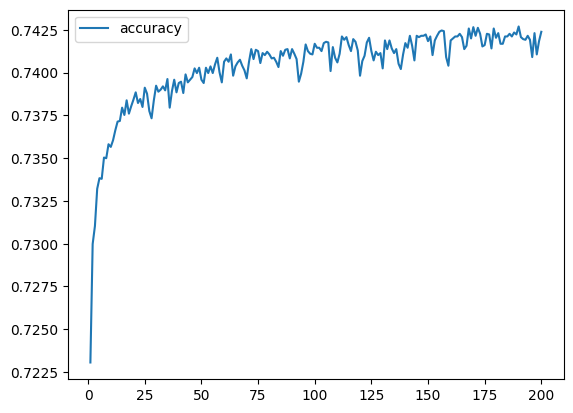

In [57]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the accuracy
history_df.plot(y="accuracy")
plt.show()

In [58]:
#save model 3
nn.save('/content/gdrive/My Drive/Colab Notebooks/AlphabetSoupCharity_Optimization3.h5')